In [3]:
# !pip install pandas

In [7]:
import pandas as pd

print(pd)

<module 'pandas' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/__init__.py'>


In [11]:
file = 'sources/eu/energy-charts_Electricity_production_and_spot_prices_in_the_European_Union_in_2023.csv'
df = pd.read_csv(file)


In [12]:
df.head()

,Date (UTC),Nuclear,Non-Renewable,Renewable,Day Ahead Auction (AT),Day Ahead Auction (BE),Day Ahead Auction (BG),Day Ahead Auction (CZ),Day Ahead Auction (DE-LU),Day Ahead Auction (DK1),...,Day Ahead Auction (NL),Day Ahead Auction (PL),Day Ahead Auction (PT),Day Ahead Auction (RO),Day Ahead Auction (SE1),Day Ahead Auction (SE2),Day Ahead Auction (SE3),Day Ahead Auction (SE4),Day Ahead Auction (SI),Day Ahead Auction (SK)
0,NaN,Power (MW),Power (MW),Power (MW),"Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)",...,"Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)","Price (EUR/MWh, EUR/tCO2)"
1,2022-12-31T23:00+00:00,62445.52,58574.94,117873.54,12.06,-4.39,20.02,4.84,-5.17,2.01,...,-3.61,18.09,0,20.02,2.01,2.01,2.01,2.01,13.31,20.26
2,2023-01-01T00:00+00:00,62281.56,57374.86,112917.18,-0.1,-1.75,0.18,-0.35,-1.07,1.38,...,-1.46,5.75,0,0.18,1.38,1.38,1.38,1.38,-0.07,0.33
3,2023-01-01T01:00+00:00,61603.39,57138.86,111083.5,-0.66,-1.46,0.01,-0.97,-1.47,0.09,...,-1.52,5.27,0,0.01,0.09,0.09,0.09,0.09,-0.47,0.5
4,2023-01-01T02:00+00:00,60891.25,56359.88,108987.05,-1.99,-5.27,0.01,-1.93,-5.08,0.08,...,-5,5.74,0,0.01,0.08,0.08,0.08,0.08,-1.56,0.5


In [14]:
# Convert the 'Date (UTC)' column to datetime
df['Date (UTC)'] = pd.to_datetime(df['Date (UTC)'])

In [15]:
# Filter for the month of March
df_march = df[df['Date (UTC)'].dt.month == 3]

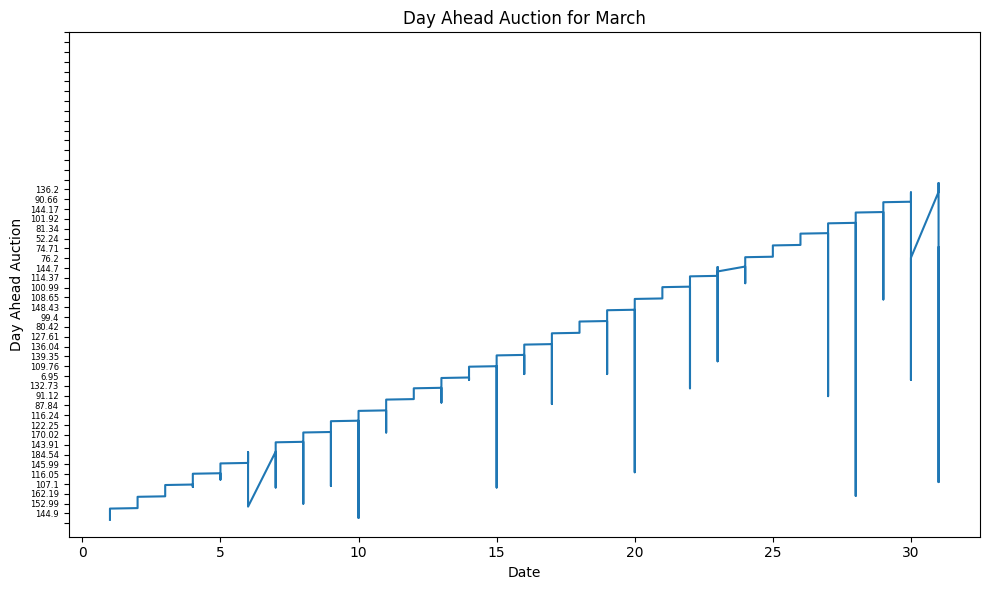

In [22]:
import matplotlib.pyplot as plt

y_ticks = range(-7, 1000, 20) 

# Plot 'Day Ahead Auction' for March
plt.figure(figsize=(10,6))
plt.plot(df_march['Date (UTC)'].dt.day, df_march['Day Ahead Auction (AT)'])
plt.title('Day Ahead Auction for March')
plt.xlabel('Date')
plt.ylabel('Day Ahead Auction')
plt.xticks(rotation=0)
plt.yticks(rotation=0, fontsize=6)
plt.yticks(y_ticks)
plt.tight_layout()

plt.show()

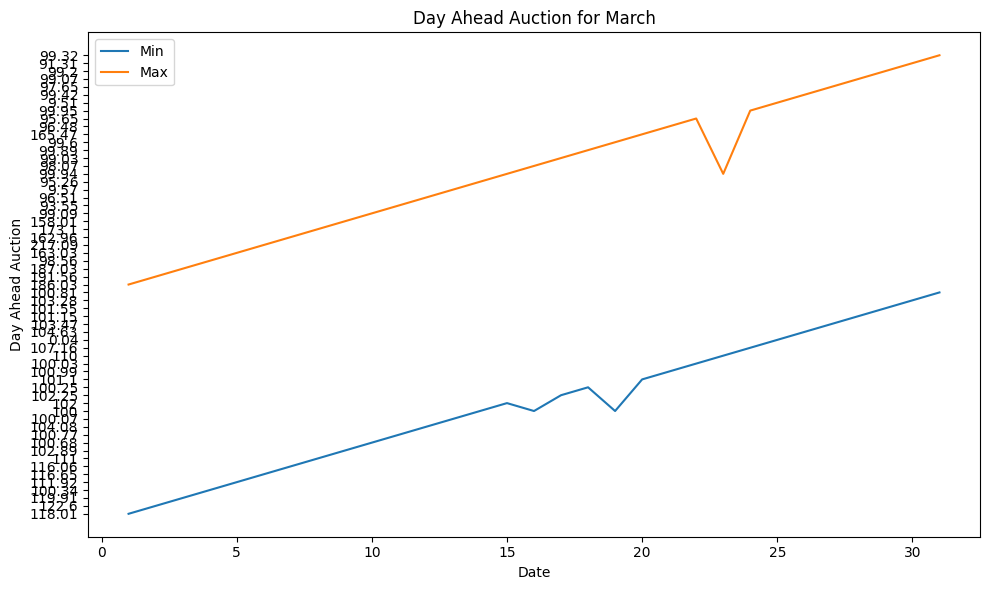

In [30]:
import matplotlib.pyplot as plt

# Group by day and calculate min and max
df_march_grouped = df_march.groupby(df_march['Date (UTC)'].dt.day)['Day Ahead Auction (AT)'].agg(['min', 'max'])

# Plot min and max 'Day Ahead Auction' for each day in March
plt.figure(figsize=(10,6))
plt.plot(df_march_grouped.index, df_march_grouped['min'], label='Min')
plt.plot(df_march_grouped.index, df_march_grouped['max'], label='Max')
plt.title('Day Ahead Auction for March')
plt.xlabel('Date')
plt.ylabel('Day Ahead Auction')
plt.xticks(rotation=0)
plt.yticks(rotation=0, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the 'Day Ahead Auction (AT)' column and transform it
df_march.loc[:, 'Scaled Day Ahead Auction (AT)'] = scaler.fit_transform(df_march[['Day Ahead Auction (AT)']])


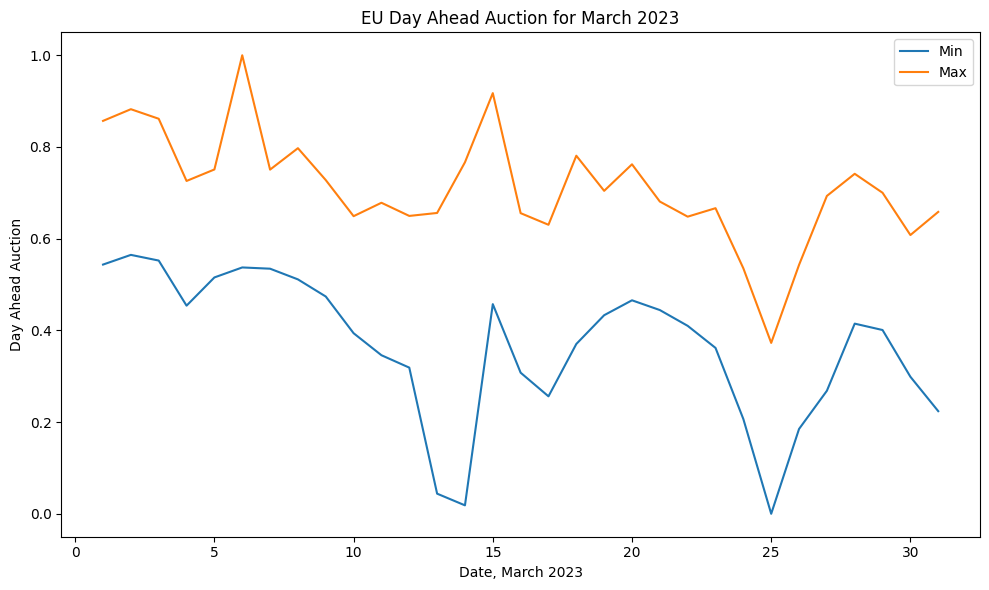

In [29]:
import matplotlib.pyplot as plt

# Group by day and calculate min and max
df_march_grouped = df_march.groupby(df_march['Date (UTC)'].dt.day)['Scaled Day Ahead Auction (AT)'].agg(['min', 'max'])

# Plot min and max 'Day Ahead Auction' for each day in March
plt.figure(figsize=(10,6))
plt.plot(df_march_grouped.index, df_march_grouped['min'], label='Min')
plt.plot(df_march_grouped.index, df_march_grouped['max'], label='Max')
plt.title('EU Day Ahead Auction for March 2023')
plt.xlabel('Date, March 2023')
plt.ylabel('Day Ahead Auction')
plt.xticks(rotation=0)
plt.yticks(rotation=0, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()